# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset, `noshowappointments-kagglev2-may-2016.csv` focuses on whether or not patients show up for appointments, data was collected from 100k medical appointments in Brazil.  With a total of 11283 entries, and 14 columns/variables. Most of these variables are self-explanatory, some additional details on some variables that should be of importace include;
>
> - 'Scholarship' indicates whether or not the patient is enrolled in brasilian welfareprogram  __[Bosla Familia](http://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000)__
   
> - 'Neighborhood' indicates the location of the hospital
> - 'ScheduleDay' tells us the day the patient set up an appointment
> - Equally important is the fact that on the 'No-show' column, 'No' indicates the patient showed up and 'Yes' if they didn't.
>
>__[Source](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)__

### Variables
>
> This variables are displayed as currently in the dataset.
><ol>
><li> PatientId </li>
><li> AppointmentID</li>    
><li> Gender </li>
><li> ScheduledDay</li>
><li> AppointmentDay </li>
><li> Age</li>
><li> Neighbourhood</li>
><li> Scholarship</li>
><li> Hipertension</li>
><li> Diabetes</li>
><li> Alcoholism</li>
><li> Handcap</li>
><li> SMS_received</li>
><li> No-show</li>
></ol>
### Questions
> Bellow is a list of the questions we will be trying to answer given our dataset.
>- Does the gender have any measure influence on the patient showing up or not?
>- Does the wiating period between scheduling and appointment time affect possibility of showing up or not?
>- Is patient's age of any noticeable influence on the patient showing up?
>- Does the neighborhood affect the rate of patients showing up?
>- Is patient's condition affecting the show up rate?
>- Does patient's deases affect show up rate?
>- Last but not the least, is there any measure difference in showing up between patients who received and SMS and those who didn't?

Below we will import all required libaries in other to properly investigate our dataset


In [154]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing datetime
import datetime as dt

#importing seaborn
import seaborn as sns 

#importing matplotlib
import matplotlib.pyplot as plt

#Inline statement to display plots in notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Now we will take a look at our data and check it's actual cleanliness state and also what variables we will be focusing on for our investigation, and most importantly that will permit us to answer our questions. 

### General Properties

In [359]:
# Loading our data into a dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#taking a look at our data to see if everything was properly loaded
df.sample(n=10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59611,3.246493e+14,5690120,F,2016-05-12T09:31:14Z,2016-05-12T00:00:00Z,47,SÃO JOSÉ,0,1,1,1,0,0,No
62814,6.278242e+13,5733534,F,2016-05-24T14:00:02Z,2016-05-24T00:00:00Z,48,JARDIM CAMBURI,0,0,0,0,0,0,Yes
9356,9.744384e+14,5678420,F,2016-05-10T08:29:23Z,2016-05-10T00:00:00Z,59,SANTOS DUMONT,0,1,0,0,0,0,Yes
19247,5.543879e+14,5643633,F,2016-05-02T07:41:09Z,2016-05-02T00:00:00Z,2,SANTO ANTÔNIO,0,0,0,0,0,0,No
47809,3.241459e+12,5574374,M,2016-04-12T14:47:25Z,2016-05-05T00:00:00Z,12,MARUÍPE,0,0,0,0,0,1,No
70964,2.679223e+13,5343286,F,2016-02-12T15:03:15Z,2016-05-09T00:00:00Z,57,TABUAZEIRO,0,1,0,0,0,0,No
85230,4.886351e+14,5767528,M,2016-06-02T18:21:55Z,2016-06-02T00:00:00Z,38,PONTAL DE CAMBURI,0,0,0,0,0,0,No
89844,3.816828e+10,5734983,F,2016-05-24T16:35:46Z,2016-06-02T00:00:00Z,62,JARDIM CAMBURI,0,0,0,0,0,1,No
100744,8.972433e+13,5621489,F,2016-04-26T10:22:33Z,2016-06-06T00:00:00Z,68,TABUAZEIRO,0,1,0,0,0,0,No
14611,9.334849e+11,5564036,M,2016-04-11T07:09:08Z,2016-05-05T00:00:00Z,19,SÃO CRISTÓVÃO,0,0,0,0,0,1,No


>Now we will look at some general information about our data, such as the number of rows and columns and the datatypes of the columns and their index.

In [360]:
#checking information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>From the above it confirms that our dataset has no NaN values

>We will take a look at the unique values in `Schorlarship, Hipertension, Diabetes, Alcoholism, Handicap, SMS_received` in other to have a clear idea of the kind of values we are dealing with, as these columns will play a measure role in answering our questions.  

In [361]:
#checking unique values
print('Unique Values in Scholarship: {}'.format(df.Scholarship.unique()))
print('Unique Values in Hypertension: {}'.format(df.Hipertension.unique()))
print('Unique Values in Diabetes: {}'.format(df.Diabetes.unique()))
print('Unique Values in Alcoholism: {}'.format(df.Alcoholism.unique()))      
print('Unique Values in Handicap: {}'.format(df.Handcap.unique()))
print('Unique Values in SMS_received: {}'.format(df.SMS_received.unique()))      

Unique Values in Scholarship: [0 1]
Unique Values in Hypertension: [1 0]
Unique Values in Diabetes: [0 1]
Unique Values in Alcoholism: [0 1]
Unique Values in Handicap: [0 1 2 3 4]
Unique Values in SMS_received: [0 1]


>Now we will proceed in checking for any duplicates.

In [362]:
#checking for duplicates in rows
sum(df.duplicated())

0

>It shows that our dataset has no duplicates in it.
>
>It will be a good idea to also check for duplicate values in 'AppointmentID' column. to make sure there's no duplicate in that field, as a duplicate will indicate an error in one, and both rows will need to be dropped.


In [363]:
sum(df['AppointmentID'].duplicated())

0

>Now we are sure there's no duplicate in this column, we can proceed in doing some cleaning and trim our dataset to fit the analysis.
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.


### Data Cleaning 
>-  First we notice there are some spelling errors(typo's) in our columns, so we will begin by correcting those.
>-  We will change the datatypes for 'AppointmentDay' and 'ScheduleDay' to datetime.
>-  Since Scheduling date must be before or on the same date as appointment, we will check to see if there's any error regarding this.
>-  In addition we shall make sure our ages are realistic.
>-  Also based on the analysis we are about to perform, we won't be needing the 'PatientId' and 'AppointmentID' as they won't be of use in answering our questions.

In [364]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Renaming some columns
df = df.rename(columns={'Neighbourhood': 'Neighborhood','Hipertension': 'Hypertension','Handcap':'Handicap'})

#Changing datatypes
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')

df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')

#we shall now check recent changes made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighborhood    110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

>We shall then proceed in checking any abnormalities between scheduling and appointment dates.

In [366]:
print("There are {} records where appointment day is before scheduled day".format(df[(df['AppointmentDay']-df['ScheduledDay']).dt.days < 0].shape[0]))

There are 38568 records where appointment day is before scheduled day


>The above shows that there's some error or possible exchange between schedule date and appointment date. or a possible error due to the absence of time in the appointment date.
>
>We shall first take a look at these records to figure out what error it could be.

In [367]:
df[(df['AppointmentDay']-df['ScheduledDay']).dt.days < 0].head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
19,7.223289e+12,5640433,F,2016-04-29 10:43:14,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No
24,8.734858e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No
26,2.578785e+10,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
28,5.926172e+12,5642400,M,2016-04-29 15:48:02,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No


>From indications, it shows we have this error due to lack of time data on appointment day. We shall now clear the time data on schedule date in other for our data to be correct.

In [368]:
#Removing time data from ScheduledDay
df['ScheduledDay'] = df['ScheduledDay'].dt.date.astype('datetime64[ns]')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Now we shall run our check again and see if there's any difference.

In [369]:
print("There are {} records where appointment day is before scheduled day".format(df[(df['AppointmentDay']-df['ScheduledDay']).dt.days < 0].shape[0]))

There are 5 records where appointment day is before scheduled day


In [370]:
df[(df['AppointmentDay']-df['ScheduledDay']).dt.days < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


We can swap these dates as they might have been switched during recordig. Another option is to drop this rows as we aren't certain of what exactly the error could be. we shall go with this later option. 

In [371]:
#droping the rows with incorrect scheduledDay or appointmentDay.
df.drop([27033,55226,64175,71533,72362], inplace=True)

#checking our drop
df[(df['AppointmentDay']-df['ScheduledDay']).dt.days < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


>Hence our problem was the time data on the ScheduledDay and 5 other erronious data.
>
>We will now chek our ages to make sure they are realistic.

In [372]:
#Checking unique values for Ages
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [373]:
#checking lowest value
df.Age.min()

-1

In [374]:
#checking largest value
df.Age.max()

115

In [375]:
df[df.Age == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


>Looking at the minimum age we can only assume it was a check up done by a pregnant woman to check her unborn child, and also that all the '0' ages are for babies. in other to check this, we shall now check to see if there's any record for alcoholism, diabetes, hypertension other than '0' as this will indicate an error in our data and such a row will be dropped before further processing.

In [376]:
#checking if age 0 actually refers to babies records
df[(df.Age == 0) & ((df.Hypertension == 1) | (df.Alcoholism == 1) | (df.Diabetes == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


>This shows no record implying our assumption is correct.

>Finally we will drop the 'PatientID' and 'AppointmentID' in other to carry on with our next step.

In [377]:
#Dropping PatientID and AppointmentID, get columns index from df.info()
df.drop(df.columns[[0,1]], axis=1, inplace=True)

#checking the drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110522 non-null  object        
 1   ScheduledDay    110522 non-null  datetime64[ns]
 2   AppointmentDay  110522 non-null  datetime64[ns]
 3   Age             110522 non-null  int64         
 4   Neighborhood    110522 non-null  object        
 5   Scholarship     110522 non-null  int64         
 6   Hypertension    110522 non-null  int64         
 7   Diabetes        110522 non-null  int64         
 8   Alcoholism      110522 non-null  int64         
 9   Handicap        110522 non-null  int64         
 10  SMS_received    110522 non-null  int64         
 11  No-show         110522 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does the gender have any measure influence on the patient showing up or not?)

First we will look at the ratio of males that showed up against males who didn't and will do similar for the females and compare the respective percentages.
>For this we will be getting the total number of males and females, then the respectine number that showed up or not for the appointment based on our data.

In [378]:
#Total number of people who showed up or not: 
print(df.groupby(['No-show']).size())

#total number of males and females
print(df.groupby(['Gender']).size())

No-show
No     88208
Yes    22314
dtype: int64
Gender
F    71837
M    38685
dtype: int64


In [231]:
#Number and percentage of men who showed up or not
men_t = df[df.Gender == 'M'].shape[0]
men_s = df[(df.Gender=='M') & (df['No-show'] =='No')].shape[0]
print('Number of men who showed up: {}'.format(men_s))
print('Number of men who didn\'t show up: {}'.format(men_t - men_s))
print('Percentage of men who showed up: {:.2f}%'.format((men_s/men_t)*100))
print('Percentage of men that didn\'t show up:{:.2f}%'.format(100-((men_s/men_t)*100)))

Number of men who showed up: 30962
Number of men who didn't show up: 7723
Percentage of men who showed up: 80.04%
Percentage of men that didn't show up:19.96%


In [232]:
#Number and percentage of women who showed up or not
wmen_t = df[df.Gender == 'F'].shape[0]
wmen_s = df[(df.Gender=='F') & (df['No-show'] =='No')].shape[0]
print('Number of women who showed up: {}'.format(wmen_s))
print('Number of women who didn\'t show up: {}'.format(wmen_t - wmen_s))
print('Percentage of wommen who showed up: {:.2f}%'.format((wmen_s/wmen_t)*100))
print('Percentage of women that didn\'t show up:{:.2f}%'.format(100-((wmen_s/wmen_t)*100)))

Number of women who showed up: 57246
Number of women who didn't show up: 14591
Percentage of wommen who showed up: 79.69%
Percentage of women that didn't show up:20.31%


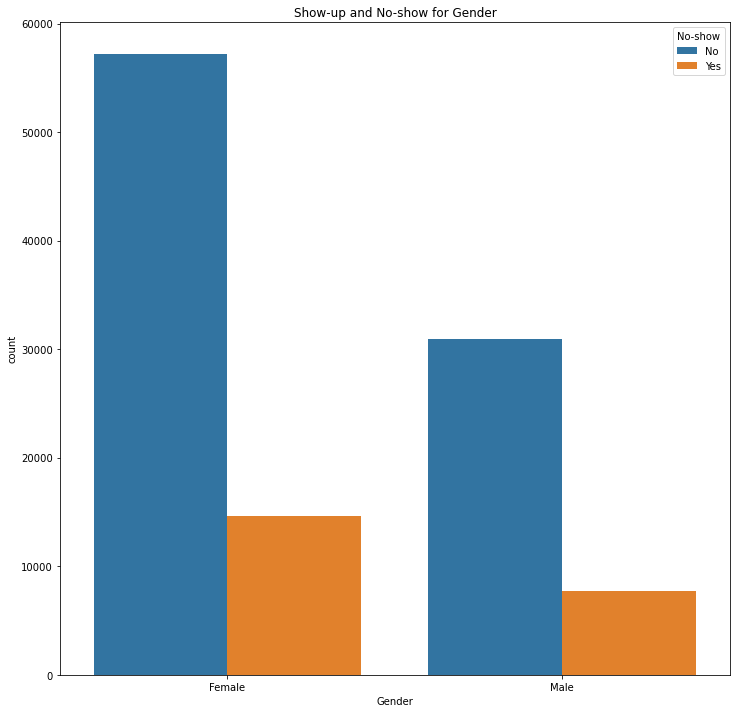

In [233]:
# visualization of gender
plt.figure(figsize=(12,12))
graph = sns.countplot(x=df.Gender, hue=df['No-show'], data=df)
labels=['Female', 'Male']
graph.set_xticklabels(labels)
graph.set_title('Show-up and No-show for Gender')
plt.show()

### Research Question 2  (Does the wiating period between scheduling and appointment time affect possibility of showing up or not?)
>
>In other to investigate this, we will need to first get the waiting time and then look at the relationship with a patient showing up or not.
>We shall be ploting a countplot against showing up and no show.
>
>We shall plot one graph for the low waiting time sample data and another for the high waiting time sample data

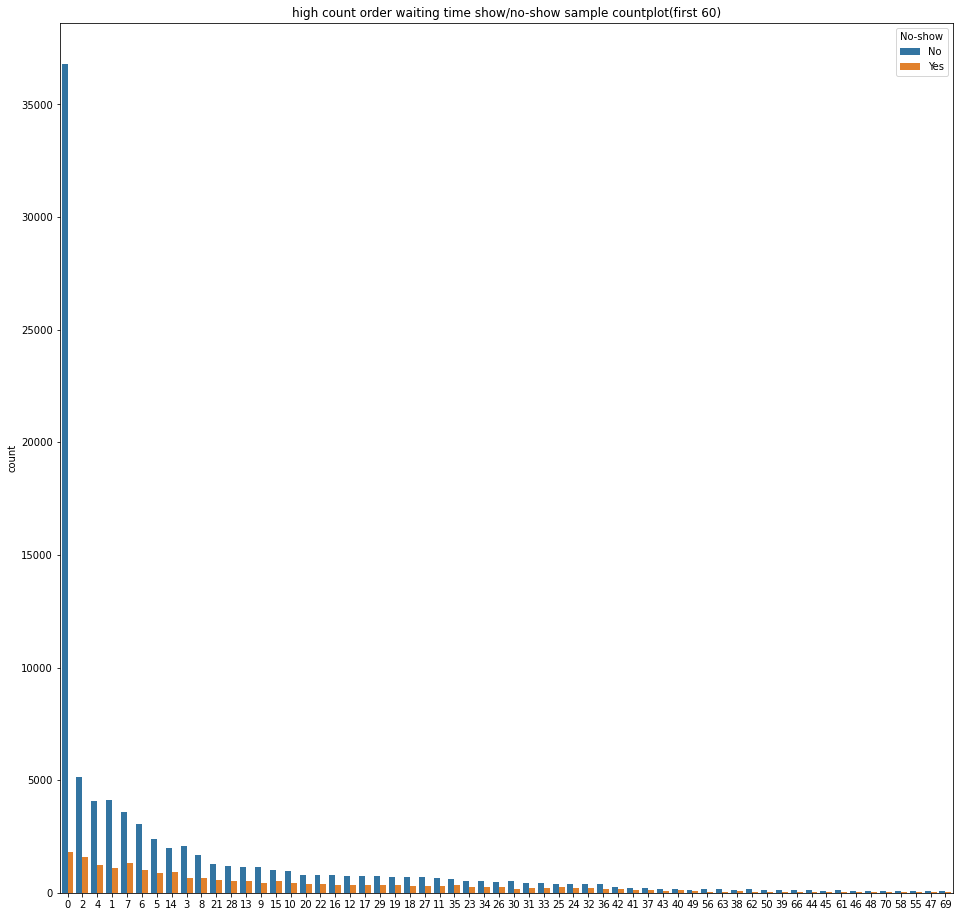

In [234]:
#We shall be plotting based on the waiting time Value count
#plot 1
plt.figure(figsize=(16,16))
graph = sns.countplot(x=(df.AppointmentDay - df.ScheduledDay).dt.days, hue=df['No-show'], order=((df.AppointmentDay - df.ScheduledDay).dt.days).value_counts().iloc[:60].index)
graph.set_title('high count order waiting time show/no-show sample countplot(first 60)')
plt.show()

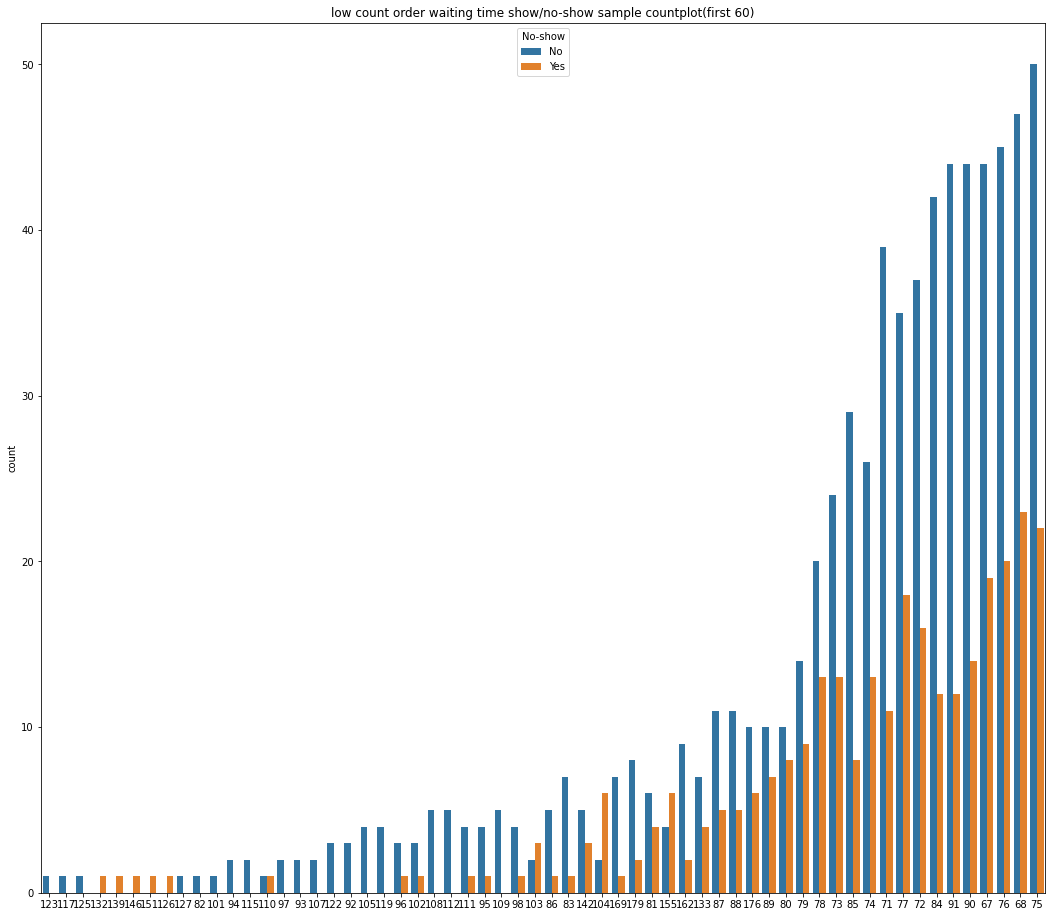

In [235]:
#plot 2
plt.figure(figsize=(18,16))
graph = sns.countplot(x=(df.AppointmentDay - df.ScheduledDay).dt.days, hue=df['No-show'], order=((df.AppointmentDay - df.ScheduledDay).dt.days).value_counts(ascending=True).iloc[:60].index)
graph.set_title('low count order waiting time show/no-show sample countplot(first 60)')
plt.show()

### Research Question 3(Is patient's age of any noticeable influence on the patient showing up?)
>
>Here we will try to look at the patients age and relationship btw showing up or not.
>We shall also check the percentage show up and no show up for the various ages.


<function matplotlib.pyplot.show(close=None, block=None)>

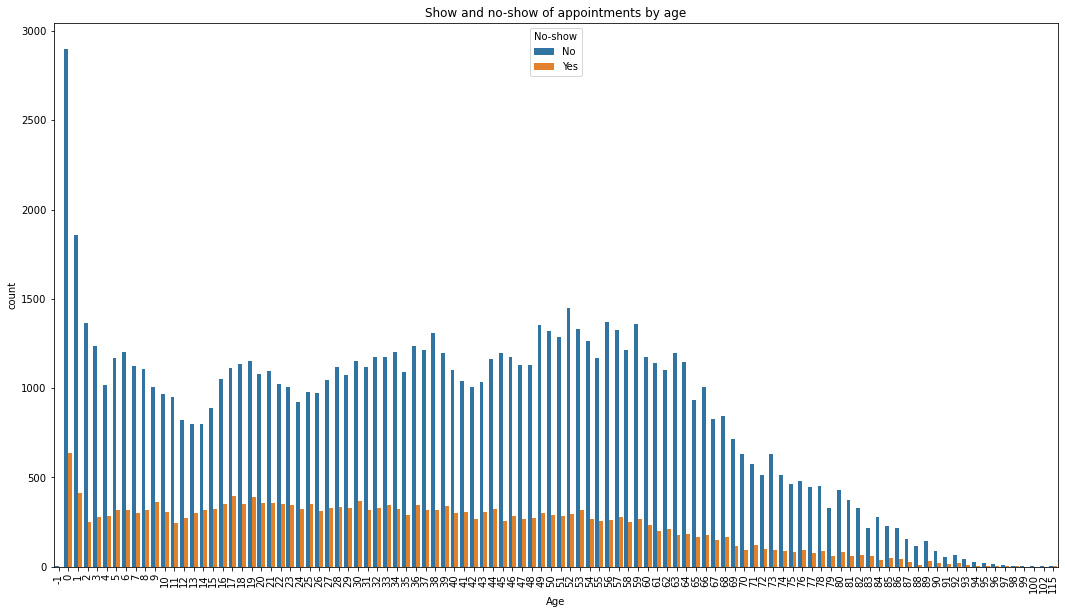

In [236]:


#plot 1 
plt.figure(figsize=(18,10))
graph = sns.countplot(x=df.Age, hue= df['No-show'])
graph.set_title('Show and no-show of appointments by age')
plt.xticks(rotation=90)
plt.show


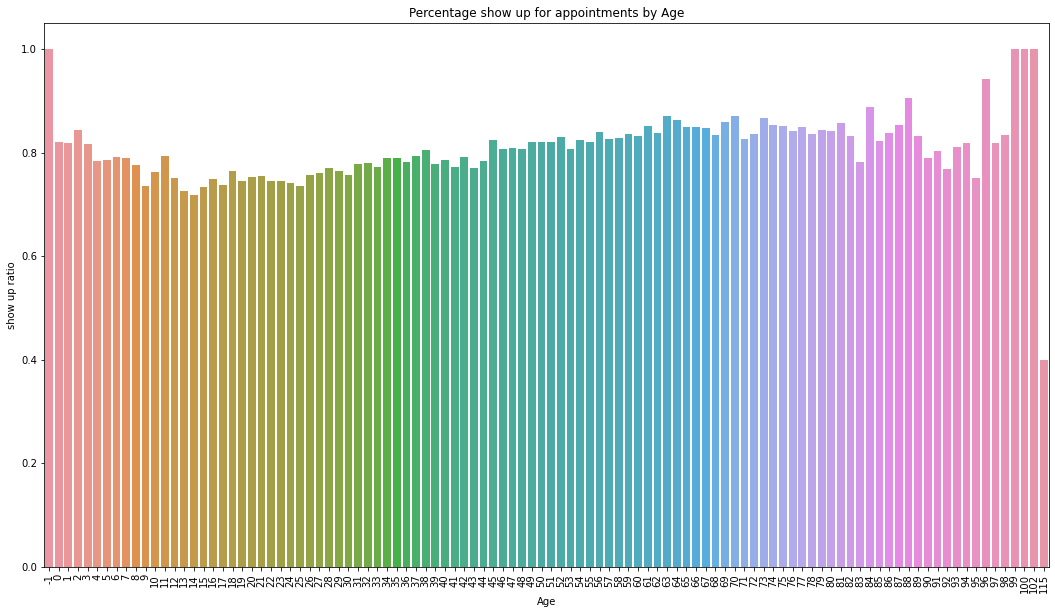

In [288]:
#Function to plot percentage show up for any variable
def percentage_show_plt(column_name):
    ratio = df[df['No-show'] == 'No'].groupby([column_name]).size()/df.groupby([column_name]).size()
    plt.figure(figsize=(18,10))
    ylabel = 'show up ratio'
    graph = sns.barplot(x=ratio.index, y=ratio)
    title = 'Percentage show up for appointments by '+ column_name
    graph.set_title(title)
    graph.set_ylabel(ylabel)
    if(ratio.shape[0] > 16):
        plt.xticks(rotation=90)
    plt.show
    
#plotting percentage show up for Appointments by age
percentage_show_plt('Age')


We shall then proceed by checking the distribution of age across showing up or not. ***note*** this intuition and method is based on a review received concerning this data exploration.

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,37.790064,23.338878,-1.0,18.0,38.0,56.0,115.0
Yes,22314.0,34.317872,21.965009,0.0,16.0,33.0,51.0,115.0


<Figure size 1152x720 with 0 Axes>

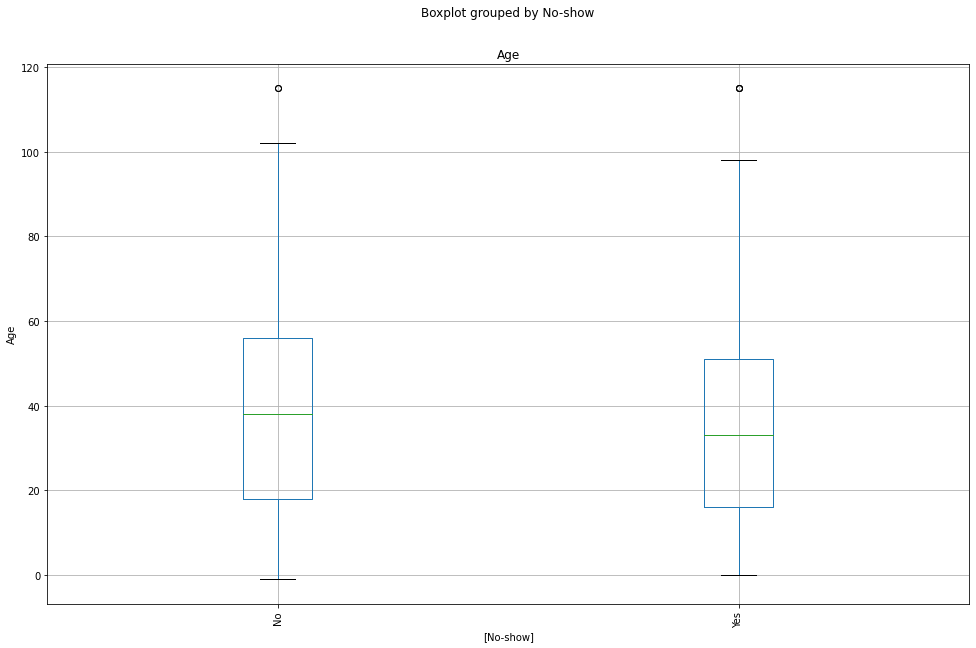

In [391]:
#boxplot for age distribution
df.boxplot(column=['Age'], by = ['No-show'],figsize=(16,10), rot=90)
plt.ylabel('Age')
pd.DataFrame(df.groupby(['No-show'])['Age'].describe())

>We notice that our mean age for showing up is around 38 and not showing up 34. and that the IQR for showing up is between 18 and 56 and for not showing up between 15 and 50 and we see some outliers in both distribution. most importantantly, the figure shows a normal distribution in both cases. 

### Research Question 4(Does the neighborhood affect the rate of patients showing up?)
>Here we shall simply look at the percentage show up of patients by neighborhood.

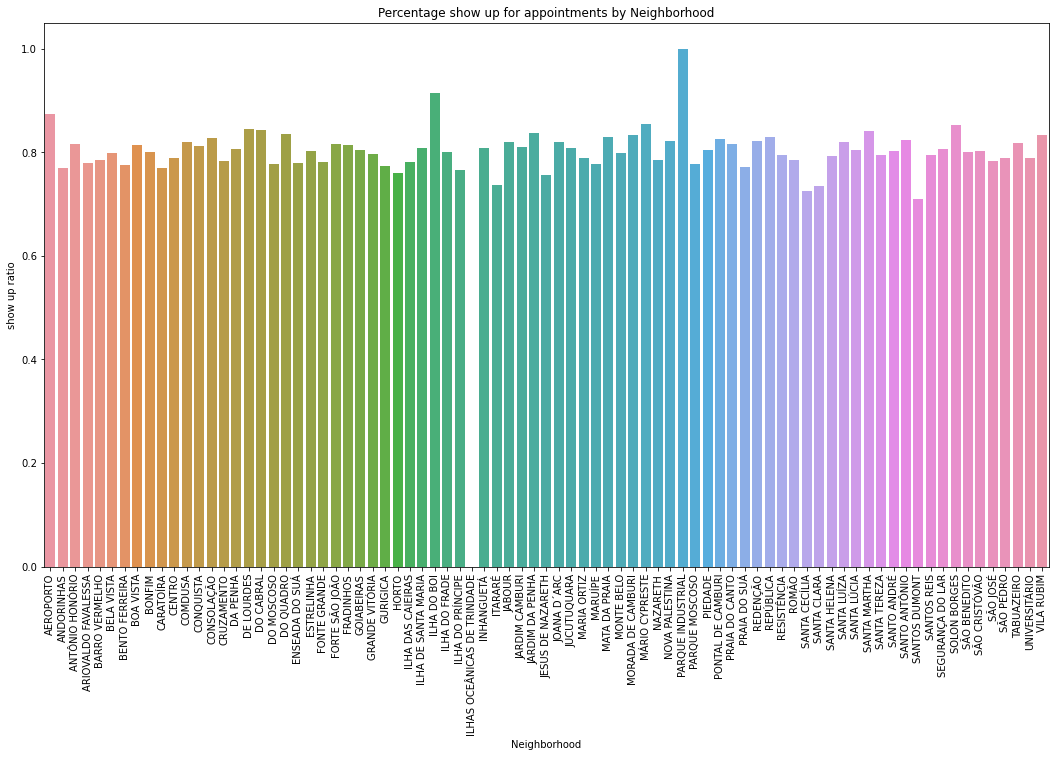

In [290]:
#plotting the percentage show up by neiborhood
percentage_show_plt('Neighborhood')

>The above shows some particular neighborhood with high show up percentage, it will be a great idea to check if that may be as a result of low number of appointments or not.
>Hence we shall plot another graph of the number of appointments by neighborhood.

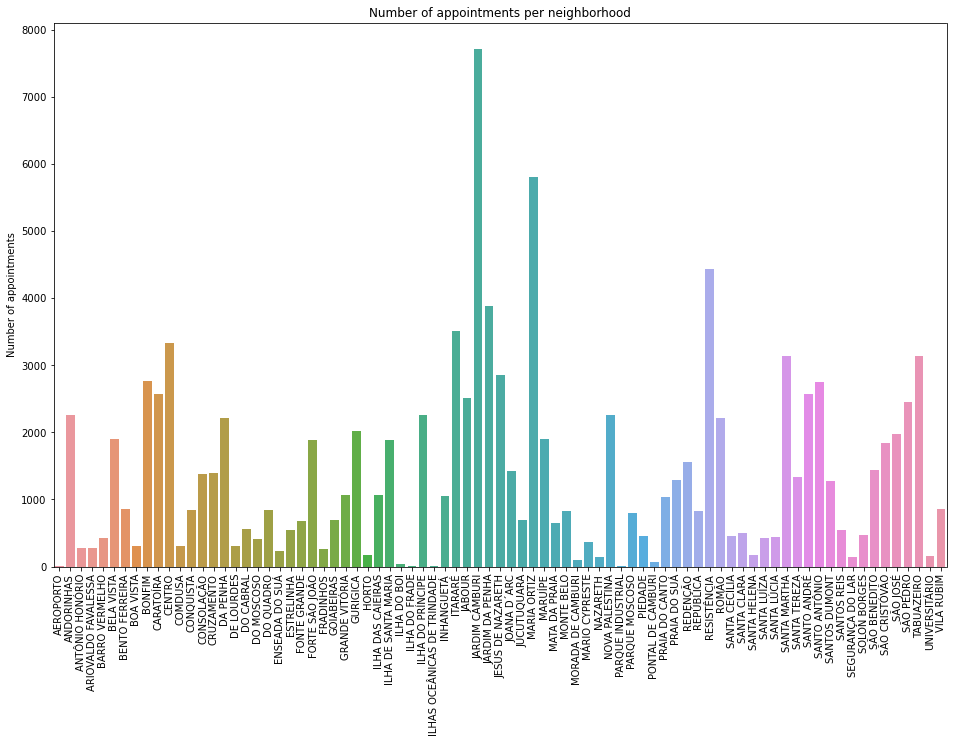

In [291]:

plt.figure(figsize=(16,10))
graph = sns.countplot(x=np.sort(df.Neighborhood))
graph.set_title('Number of appointments per neighborhood')
graph.set_ylabel('Number of appointments')
plt.xticks(rotation=90)
plt.show()

>this clearly shows that the initially visualized high show up rate in areas like `PARQUE INDUSTRIAL` is as a result of low appointments in the area

### Research Question 5(Is patient's condition affecting the show up rate?)
>
>Here we shall be looking at what effect a patients condition(handicap or not) has on both appointment and show up 

<AxesSubplot:>

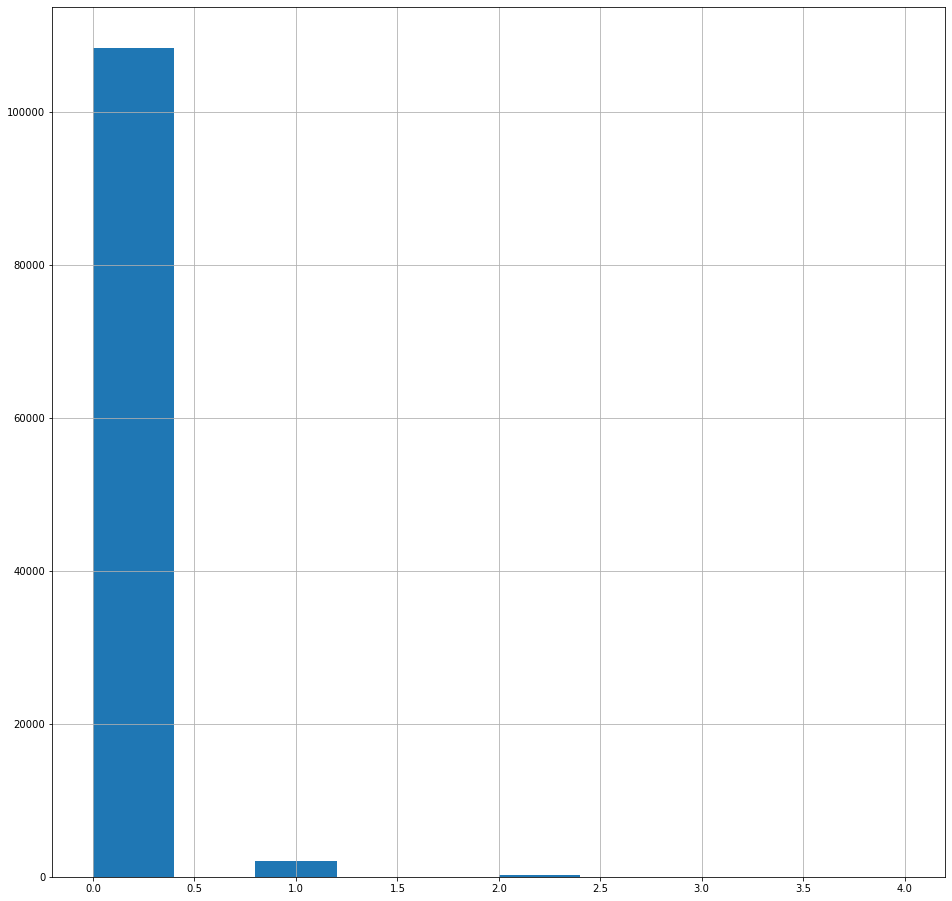

In [292]:
#First we will plot a histogram to check appointment counts for handicap
df.Handicap.hist(figsize=(16,16))

>From the above fig it's clear most of the patients are not handicap.
>
>Now we shall plot the show and no show histogram for hadicap

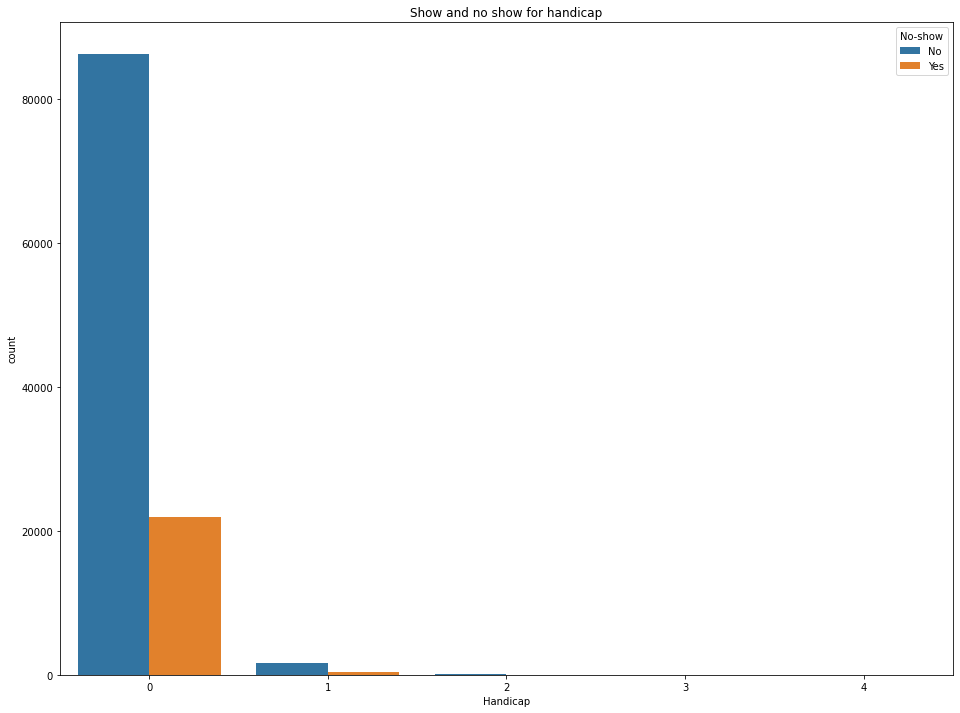

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,0.022742,0.162750,0.0,0.0,0.0,0.0,4.0
Yes,22314.0,0.020212,0.156412,0.0,0.0,0.0,0.0,4.0


In [392]:
plt.figure(figsize=(16,12))
graph = sns.countplot(x=df.Handicap, hue=df['No-show'],data=df)
graph.set_title('Show and no show for handicap')
plt.show()
pd.DataFrame(df.groupby(['No-show'])['Handicap'].describe())

>Since we can't draw much conclusion from the above plot, we shall then compare the percentage show up for handicap.

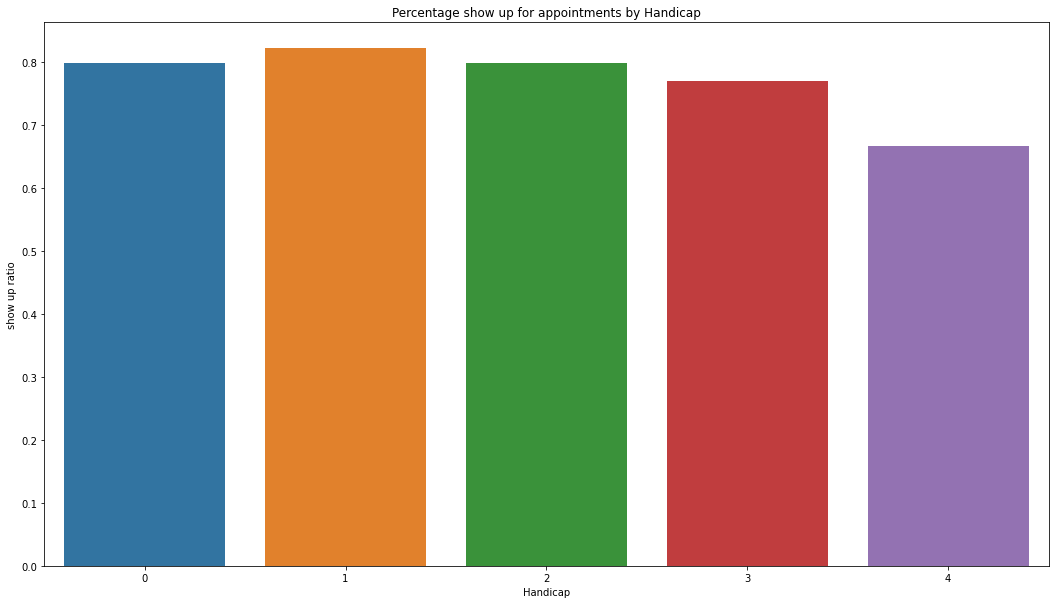

In [294]:
#plotting the percentage show up by handicap
percentage_show_plt('Handicap')

Here it's clear that a high percentage for the different subgroup show up for appointments but we can also notice that there's a little bit of difference for each separate group

### Research Question 6(Does patient's deases affect show up rate?)
> Here we shall proceed by checking the percentage show up for every diseases.
> we shall proceed by checking if there's any relationship between a patient having 2 or more of these conditions and how it affects the show up rate


- Hypertension


,count
Hypertension,
0,88721
1,21801


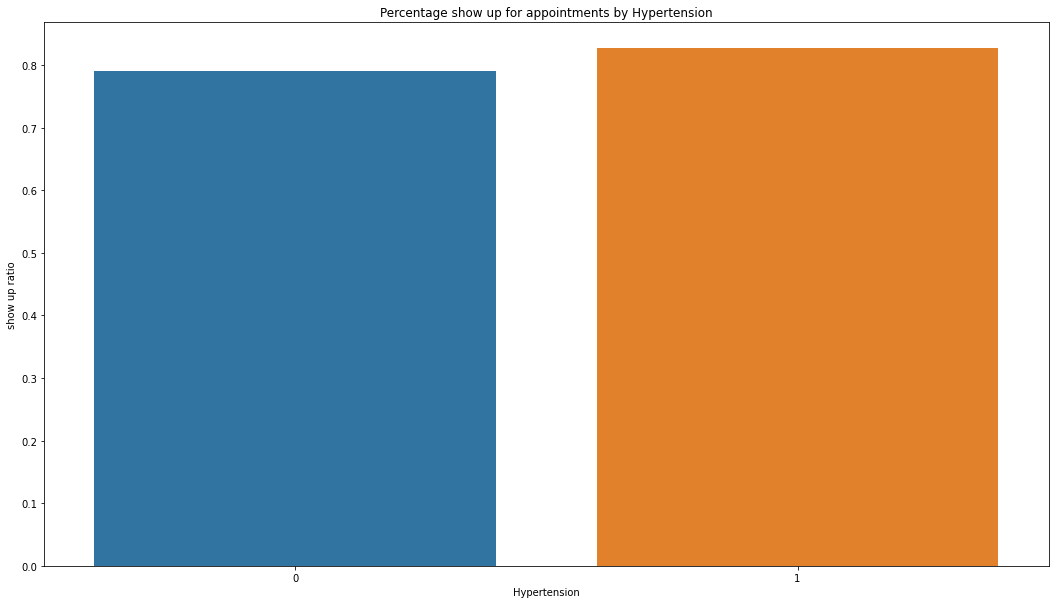

In [311]:
#plotting the percentage show up by hypertension
percentage_show_plt('Hypertension')
#getting appointment count
pd.DataFrame(df.groupby(['Hypertension'])['No-show'].describe().loc[:,['count']])

- Diabetes

,count
Diabetes,
0,102579
1,7943


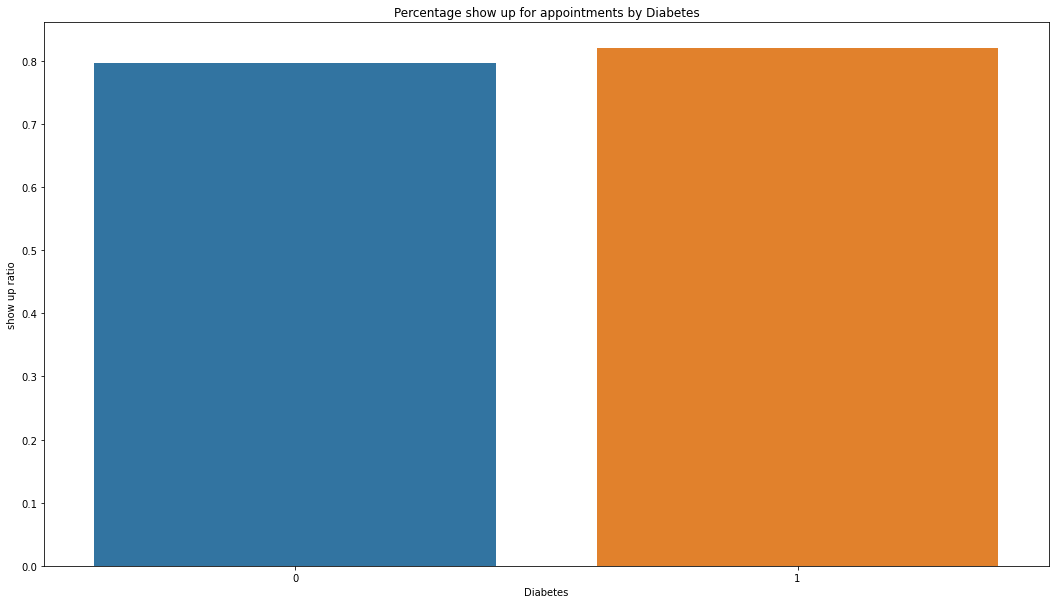

In [310]:
#plotting percentage show up by diabetes
percentage_show_plt('Diabetes')
#getting appointment count
pd.DataFrame(df.groupby(['Diabetes'])['No-show'].describe().loc[:,['count']])

- Alcoholism

,count
Alcoholism,
0,107162
1,3360


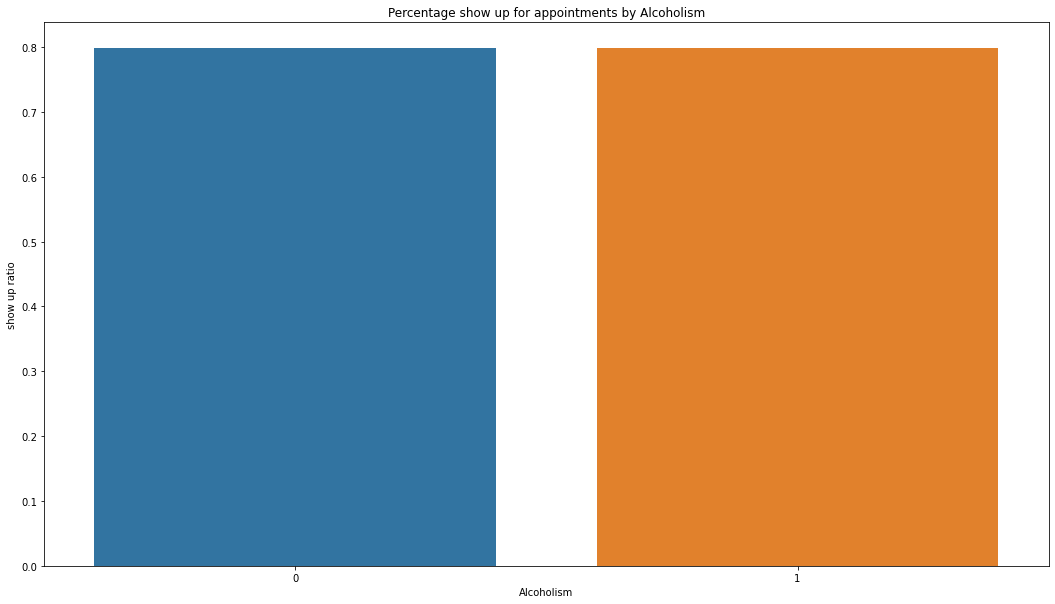

In [312]:
#plotting the percentage show up by alcoholism
percentage_show_plt('Alcoholism')
#getting appointment count
pd.DataFrame(df.groupby(['Alcoholism'])['No-show'].describe().loc[:,['count']])


Now we will proceed by checking the relationship between the various conditions.

In [316]:
#checking relation ship betwwen the various conditions
df[(df.Hypertension == 1) & (df.Diabetes == 1) & (df.Alcoholism == 1)].describe()


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,256.000000,256.000000,256.0,256.0,256.0,256.000000,256.000000
mean,58.812500,0.078125,1.0,1.0,1.0,0.054688,0.304688
std,10.091542,0.268894,0.0,0.0,0.0,0.244423,0.461177
min,28.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
25%,53.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
50%,59.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
75%,66.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000
max,84.000000,1.000000,1.0,1.0,1.0,2.000000,1.000000


> We see above that we have a total of 256 patients that suffer from all three diseases, now we shall check if these patients have a higher show up rate than the others or not. 

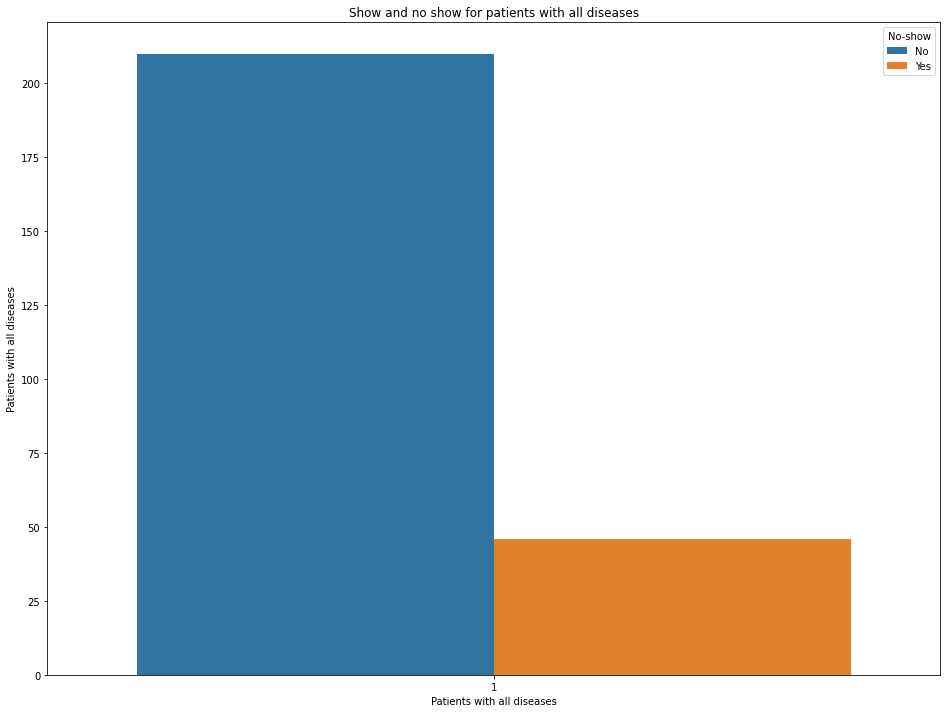

Percntage show up: 82.03%


,count,unique,top,freq
No-show,,,,
No,210,1,No,210
Yes,46,1,Yes,46


In [358]:
#creating a sub dataset for patients with all diseases
df[(df.Hypertension == 1) & (df.Diabetes == 1) & (df.Alcoholism == 1)].to_csv('all_diseases.csv', index=False)
#reading or new dataset
df_all_diseases = pd.read_csv('all_diseases.csv')




#Histogram to visualize show up rate of patients with all diseases
plt.figure(figsize=(16,12))
graph = sns.countplot( x=df_all_diseases.Hypertension, hue=df_all_diseases['No-show'],data=df_all_diseases)
graph.set_title('Show and no show for patients with all diseases')
graph.set_ylabel('Patients with all diseases')
graph.set_xlabel('Patients with all diseases')
plt.show()
pd.DataFrame(df_all_diseases.groupby(['No-show'])['No-show'].describe())

percent_show = df_all_diseases[df_all_diseases['No-show'] == 'No'].shape[0]/df_all_diseases['No-show'].shape[0] 

print('Percntage show up: {:.2f}%'.format(percent_show*100))
pd.DataFrame(df_all_diseases.groupby(['No-show'])['No-show'].describe())

>We confirm a relatively high show up rate in patients with all diseases.
>
>We shall now check if it's the case for patients with no diseases, not forgetting that our age range should be considered between 28 and 84

In [379]:
#Getting description of dataset of patients with no diseases
df[(df.Hypertension == 0) & (df.Diabetes == 0) & (df.Alcoholism == 0)].describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,85307.000000,85307.000000,85307.0,85307.0,85307.0,85307.000000,85307.000000
mean,30.612740,0.100027,0.0,0.0,0.0,0.015462,0.324721
std,21.099125,0.300038,0.0,0.0,0.0,0.136206,0.468273
min,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,13.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,29.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,46.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000
max,115.000000,1.000000,0.0,0.0,0.0,4.000000,1.000000


In [381]:
#we shall first trim this data into a new data set, by saving the dataset without diseases
df[(df.Hypertension == 0) & (df.Diabetes == 0) & (df.Alcoholism == 0)].to_csv('no_disease.csv',index=False)

#reading the new dataset
df_nd = pd.read_csv('no_disease.csv')

#taking a look at the data
df_nd.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
1,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
3,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
4,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes


We shall now select all rows that has age between 28 and 84 

In [384]:
#Selecting ages between 28 and 84
df_nd = df_nd[(df_nd.Age >= 28) & (df_nd.Age <= 84)]

#getting statistical description of dataset
df_nd.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,44005.000000,44005.000000,44005.0,44005.0,44005.0,44005.000000,44005.000000
mean,46.957437,0.090808,0.0,0.0,0.0,0.018521,0.339961
std,13.369701,0.287339,0.0,0.0,0.0,0.145057,0.473701
min,28.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,36.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,45.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,56.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000
max,84.000000,1.000000,0.0,0.0,0.0,3.000000,1.000000


Now we shall plot a histogram based on show up or not to compare with people with all diseases in same age group

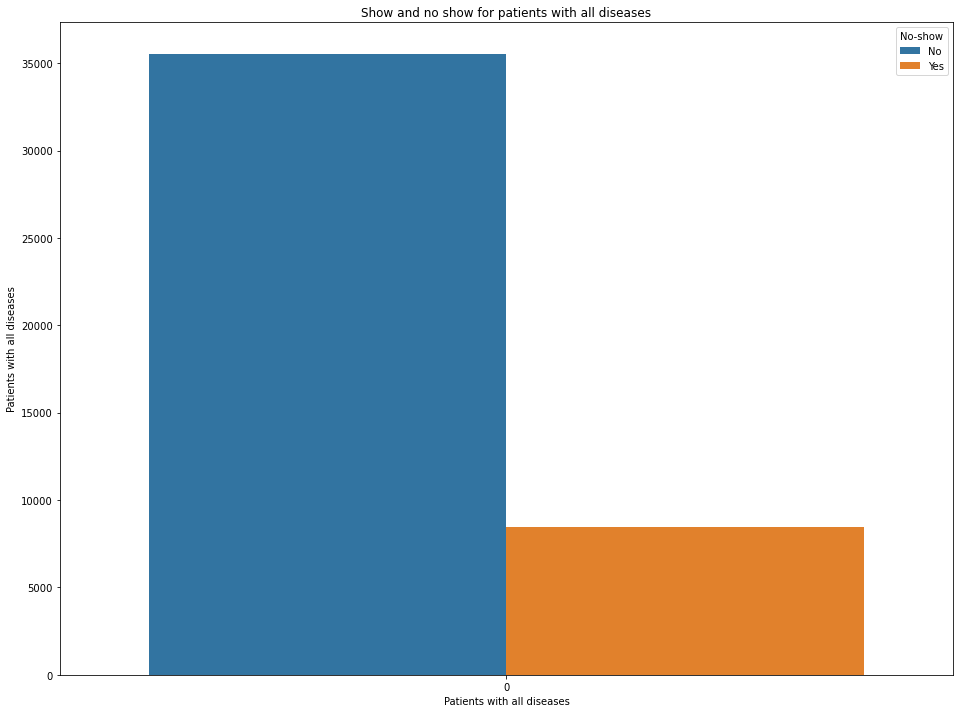

Percntage show up: 80.81%


,count,unique,top,freq
No-show,,,,
No,35561,1,No,35561
Yes,8444,1,Yes,8444


In [386]:
#Histogram to visualize show up rate of patients with no diseases
plt.figure(figsize=(16,12))
graph = sns.countplot( x=df_nd.Hypertension, hue=df_nd['No-show'],data=df_nd)
graph.set_title('Show and no show for patients with all diseases')
graph.set_ylabel('Patients with all diseases')
graph.set_xlabel('Patients with all diseases')
plt.show()
pd.DataFrame(df_nd.groupby(['No-show'])['No-show'].describe())

percent_show = df_nd[df_nd['No-show'] == 'No'].shape[0]/df_nd['No-show'].shape[0] 

print('Percntage show up: {:.2f}%'.format(percent_show*100))
pd.DataFrame(df_nd.groupby(['No-show'])['No-show'].describe())

### Research Question 7(is there any measure difference in showing up between patients who received and SMS and those who didn't?)
>To investigate this, we will just plot a similar percentage show up against receiving an sms and not receiving.

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,0.291334,0.454380,0.0,0.0,0.0,1.0,1.0
Yes,22314.0,0.438469,0.496211,0.0,0.0,0.0,1.0,1.0


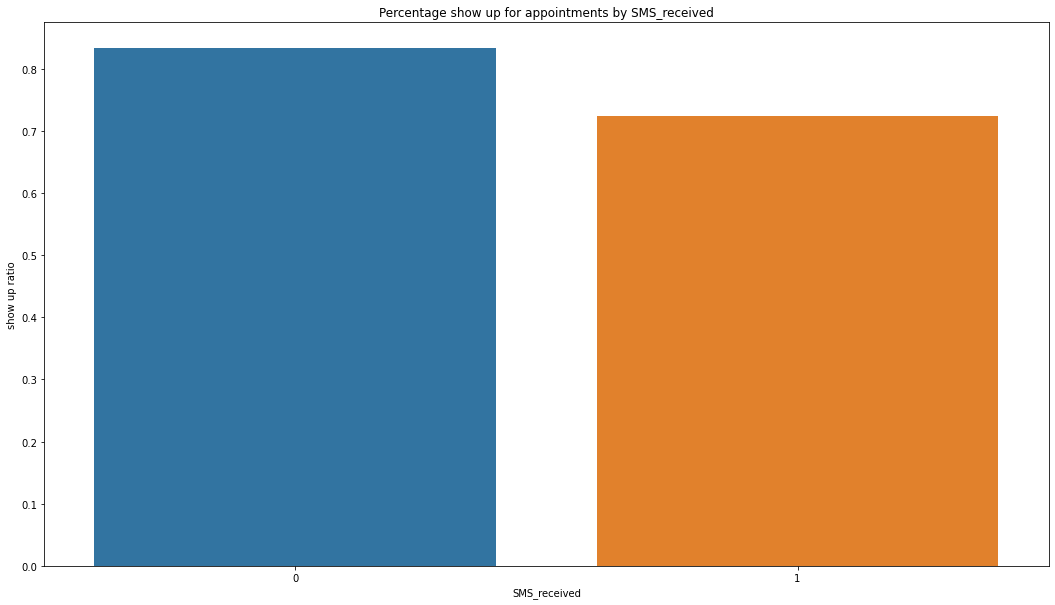

In [393]:
#plotting the percentage show up by SMS receoived
percentage_show_plt('SMS_received')
pd.DataFrame(df.groupby(['No-show'])['SMS_received'].describe())

We shall then take a look at the appointment count for SMS_received inother to have a clearer idea if sms recieved affects the show uprate

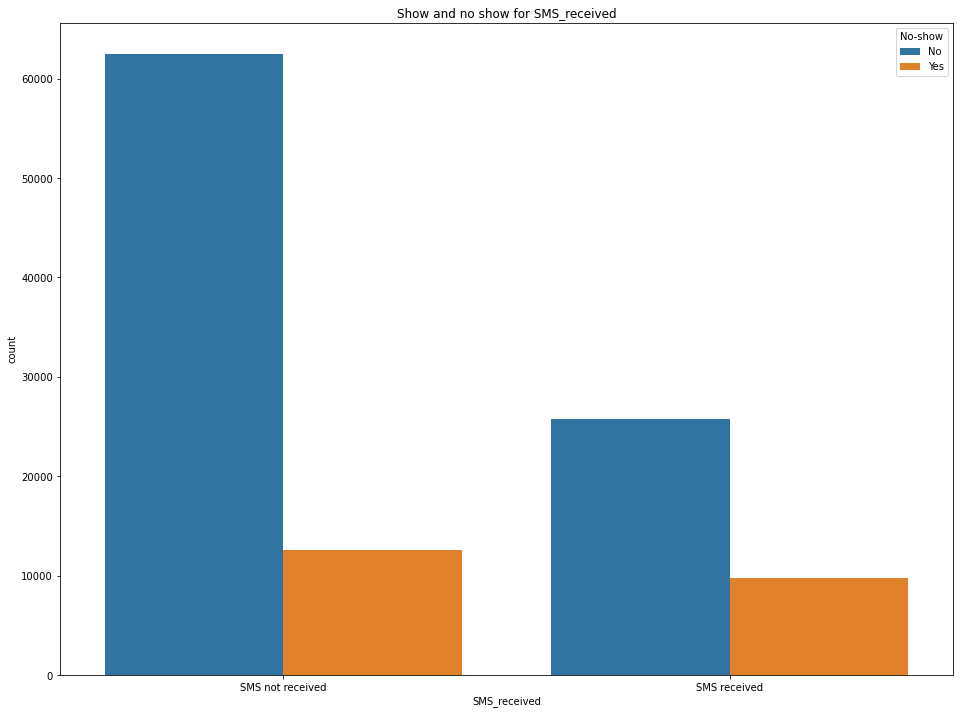

In [299]:
plt.figure(figsize=(16,12))
graph = sns.countplot(x=df.SMS_received, hue=df['No-show'],data=df)
graph.set_title('Show and no show for SMS_received')
label=['SMS not received','SMS received']
graph.set_xticklabels(label)
plt.show()

<a id='conclusions'></a>
## Conclusions


>- First, concerning gender and show up rate, we first calculated the show up rate for male and female. the reason is to compare if this individual rates show any measure difference, which will imply that the independent variable gender, plays a huge role in a client showing up or not. But both male and female show up rate was about 80% implying that gender doesn't really determing if a client will show up or note.

>- Secondly, concerning the waiting time and show up rate, we calculated the show up rate based on waiting days and  it could be noticed that the show up rate was higher for appointments made on the same day followed by 1,2,3 and 4, so we can conclude that the lower the waiting time, the higher are the chances of the client showing up.

>- Thirdly, with regards to patients age and how it affects the patient showing up or not, we checked the showing up against not showing up ratio, and later on checked the percentage show up for the various ages, none of these could really show any significant relationship with the patient showing up or not, even with some age group having a very high show up rate. but when we plotted the boxplot, we could see that the distribution was normal in both cases, with some few outliers. As such we can't conclude that age is of any measure influence in determining whether or not a patient will show up.

>- fourthly, we computed the percentage show up by neighbour hood, and the percentage show up by neighborhoods tend to be uniformly high for all neigborhoods, as such neigborhood isn't much of a key determining factor of if patients will show up or not.

>- Also, we computed percentage show up by handicap and noticed that The handicap feature varies a little bit so we can say to some extend that handicap can determine if a patient will show up or not.

>- We visualised the show up percentage for independent variables; hypertension, diabetes and alcoholism and clearly notice that patients with hypertension and diabetes showed up more, relative to those without. But for alcoholism, there's no measure difference. we futher computed the show up percentage for age group 28 to 84 for patients who have all three conditions and those without any and our results was 82% show up and 80% show up respectively, hence we can say a patient with all 3 conditions has a higher probability of showing up.

>- Last, from our visualisations for SMS_received above, we clearly see that most patients didn't receive an SMS, yet the show up rate was high. Also  show up rate for patients who received an sms is clearly higher.

> Perhaps much infomation wasn't given about an sms reception criteria, which maybe if one of these criteria was that only patients who are running late for appointment did receive an sms, then this data would have been valuable in determining if the time of reception affected the show up by patients.

> In addition, these questions where analysed purely for the related independent variable's effect on a patient showing up or not, but for Question 6 where we looked at how some independent variables related to a single dependent variable and it's effect on a patient showing up or not.
> that said, we should keep in mind that the combination of these independent variables into a single variable will in most cases affect patient's show up.